In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"Datasets\Student Mental health.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

data.dropna(subset=['Choose your gender', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?'], inplace=True)

categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']



In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Age'].fillna(data['Age'].mean(), inplace=True)


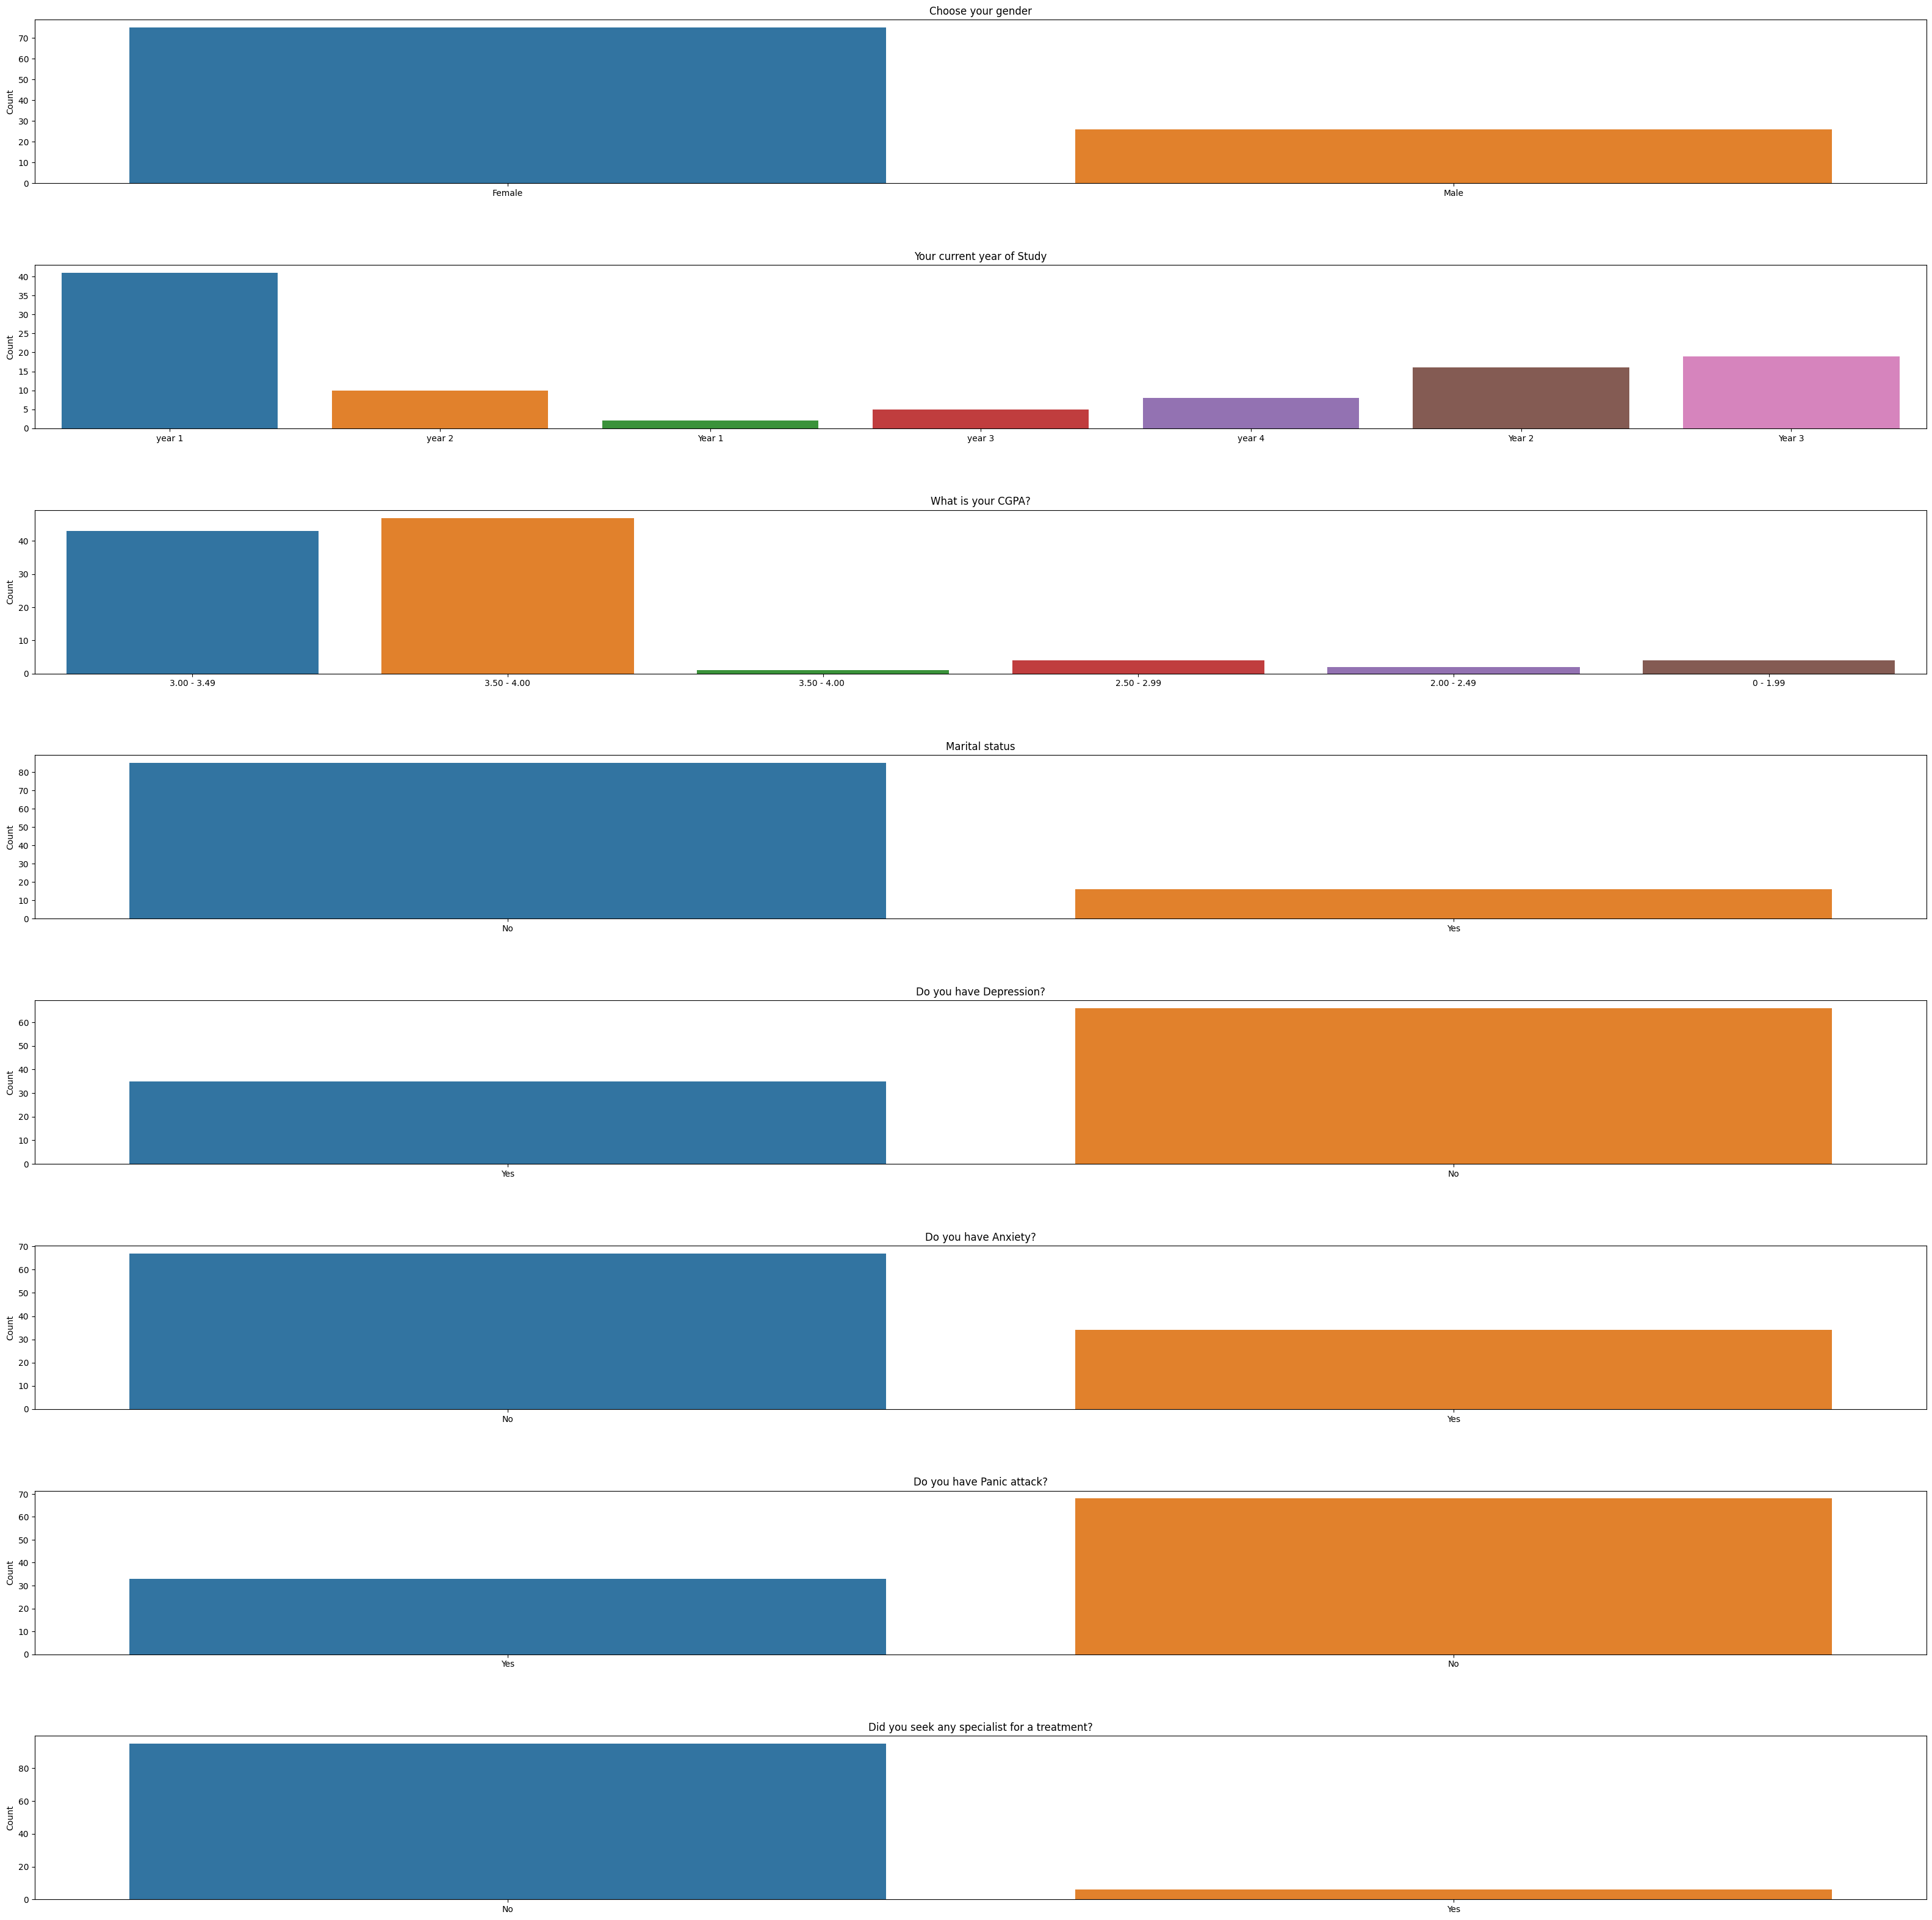

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas
categorical_columns = ['Choose your gender', 'Your current year of Study', 
                       'What is your CGPA?', 'Marital status', 'Do you have Depression?', 
                       'Do you have Anxiety?', 'Do you have Panic attack?', 
                       'Did you seek any specialist for a treatment?']

# Crear subplots para cada columna
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(40, 40))
fig.subplots_adjust(hspace=0.5)

# Graficar cada columna
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.show()

In [9]:
data = data.drop ('What is your course?', axis = 1)

data = data.drop ('Timestamp', axis = 1)

In [10]:
data['Choose your gender'] = np.where((data['Choose your gender'].__eq__("Female")),1,0)

data['What is your CGPA?'] = np.where((data['What is your CGPA?'].__eq__("3.00 - 3.49")),"1",
                            np.where((data['What is your CGPA?'].__eq__("3.50 - 4.00")),"2",
                            np.where((data['What is your CGPA?'].__eq__("2.50 - 2.99")),"3",
                            np.where((data["What is your CGPA?"].__eq__("2.00 - 2.49")),"4","5"))))

data['Marital status'] = np.where((data['Marital status'].__eq__("Yes")),1,0)

data['Your current year of Study'] = np.where((data['Your current year of Study'].__eq__("Year 1")),"1",
                            np.where((data['Your current year of Study'].__eq__("year 1")),"1",
                            np.where((data['Your current year of Study'].__eq__("year 2")),"2",
                            np.where((data["Your current year of Study"].__eq__("Year 2")),"2",
                            np.where((data["Your current year of Study"].__eq__("Year 3")),"3",
                            np.where((data["Your current year of Study"].__eq__("year 3")),"3","4"))))))

data['Do you have Depression?'] = np.where((data['Do you have Depression?'].__eq__("Yes")),1,0)
data['Do you have Anxiety?'] = np.where((data['Do you have Anxiety?'].__eq__("Yes")),1,0)
data['Do you have Panic attack?'] = np.where((data['Do you have Panic attack?'].__eq__("Yes")),1,0)
data['Did you seek any specialist for a treatment?'] = np.where((data['Did you seek any specialist for a treatment?'].__eq__("Yes")),1,0)


In [11]:
print(data.head())

   Choose your gender   Age Your current year of Study What is your CGPA?  \
0                   1  18.0                          1                  1   
1                   0  21.0                          2                  1   
2                   0  19.0                          1                  1   
3                   1  22.0                          3                  1   
4                   0  23.0                          4                  1   

   Marital status  Do you have Depression?  Do you have Anxiety?  \
0               0                        1                     0   
1               0                        0                     1   
2               0                        1                     1   
3               1                        1                     0   
4               0                        0                     0   

   Do you have Panic attack?  Did you seek any specialist for a treatment?  
0                          1                       

In [16]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BicScore, HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Cargar los datos (reemplaza esto con tu dataframe preprocesado)
# data = pd.read_csv('path_to_your_preprocessed_data.csv')

# Definir la estructura de la red bayesiana
structure = [
    ('Age', 'Do you have Depression?'),
    ('Age', 'Do you have Anxiety?'),
    ('Age', 'Do you have Panic attack?'),
    ('Do you have Depression?', 'Did you seek any specialist for a treatment?'),
    ('Do you have Anxiety?', 'Did you seek any specialist for a treatment?'),
    ('Do you have Panic attack?', 'Did you seek any specialist for a treatment?'),
    ('What is your CGPA?','Age')
]

# Crear el modelo de la red bayesiana
model = BayesianNetwork(structure)
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Realizar inferencia
inference = VariableElimination(model)

# Función para realizar predicciones
def predict(data):
    y_pred = []
    for _, row in data.iterrows():
        evidence = row.drop(['Did you seek any specialist for a treatment?']).to_dict()
        evidence = {k: evidence[k] for k in structure if k in evidence}
        result = inference.map_query(variables=['Did you seek any specialist for a treatment?'], evidence=evidence)
        y_pred.append(result['Did you seek any specialist for a treatment?'])
    return y_pred

# Realizar predicciones en el conjunto de datos
y_pred = predict(data)

# Calcular el accuracy
accuracy = (data['Did you seek any specialist for a treatment?'] == y_pred).mean()
print("Accuracy del modelo:")
print(accuracy)


Eliminating: Do you have Anxiety?: 100%|██████████| 5/5 [00:00<00:00, 714.26it/s]

Accuracy del modelo:
0.9405940594059405


Eliminating: Do you have Anxiety?: 100%|██████████| 5/5 [00:00<00:00, 833.46it/s]


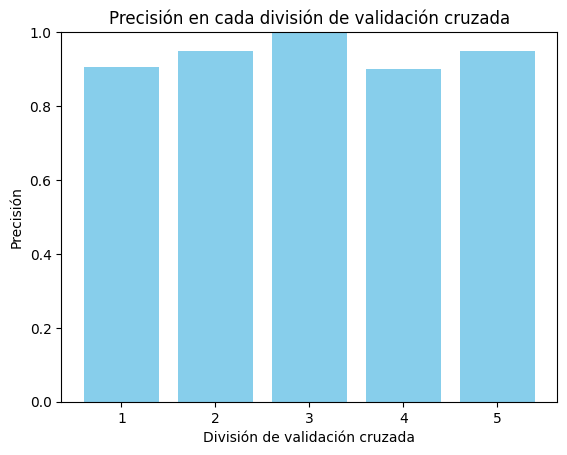

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt

accuracies = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in cv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Ajustar los parámetros del modelo utilizando el conjunto de entrenamiento
    model.fit(train_data, estimator=MaximumLikelihoodEstimator)

    # Realizar predicciones en el conjunto de prueba
    y_pred = predict(test_data)

    # Calcular la precisión
    accuracy = accuracy_score(test_data['Did you seek any specialist for a treatment?'], y_pred)
    accuracies.append(accuracy)

# Crear un gráfico de barras para visualizar las precisiones
plt.bar(range(1, len(accuracies) + 1), accuracies, color='skyblue')
plt.xlabel('División de validación cruzada')
plt.ylabel('Precisión')
plt.title('Precisión en cada división de validación cruzada')
plt.ylim(0, 1)  # Ajustar el límite del eje y entre 0 y 1
plt.show()